<a href="https://colab.research.google.com/github/anshika0601/ml-learn/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Tree

Accuracy: 1.0


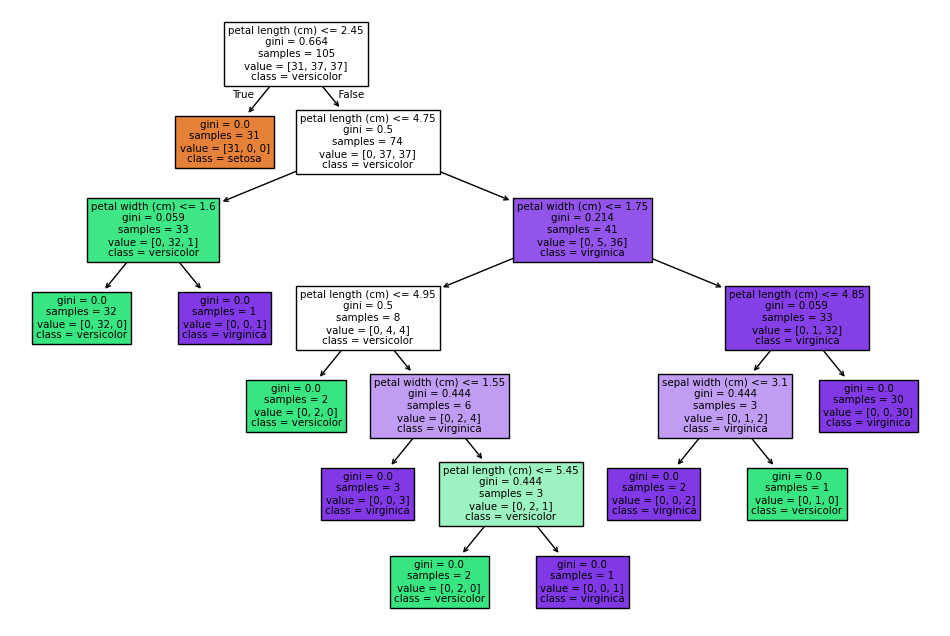

In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset (Iris dataset for classification)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fit decision tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


Pruning Applied

Number of trees after pruning: 8


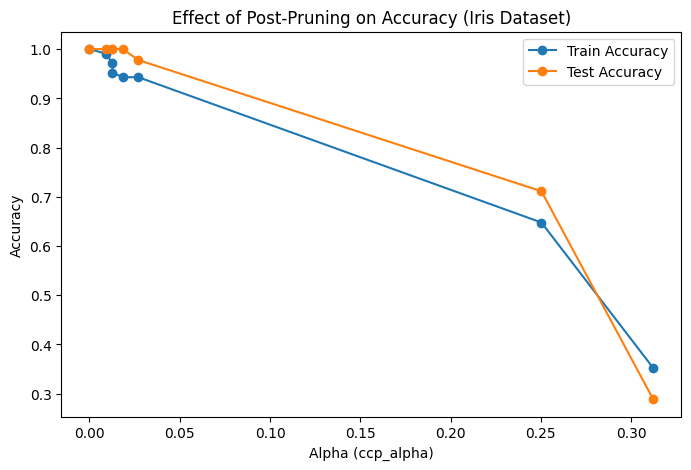

In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris # Import Iris dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset (classification)
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = iris.target

# Train-test split for Iris dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

# Fit a classification tree
clf_iris = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=42)
clf_iris.fit(X_train_iris, y_train_iris)

# Get pruning path using the Iris dataset
path = clf_iris.cost_complexity_pruning_path(X_train_iris, y_train_iris) # Use Iris train data
ccp_alphas = path.ccp_alphas

# Train multiple trees with different alphas using Iris dataset
trees = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train_iris, y_train_iris)
    trees.append(clf)

print("Number of trees after pruning:", len(trees))

# Plot accuracy vs alpha (using Iris test data for evaluation)
train_scores = [clf.score(X_train_iris, y_train_iris) for clf in trees] # Score on train data
test_scores = [clf.score(X_test_iris, y_test_iris) for clf in trees] # Score on test data

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy')
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Effect of Post-Pruning on Accuracy (Iris Dataset)")
plt.legend()
plt.show()



Regression Tree

MSE: 0.5210801561811793


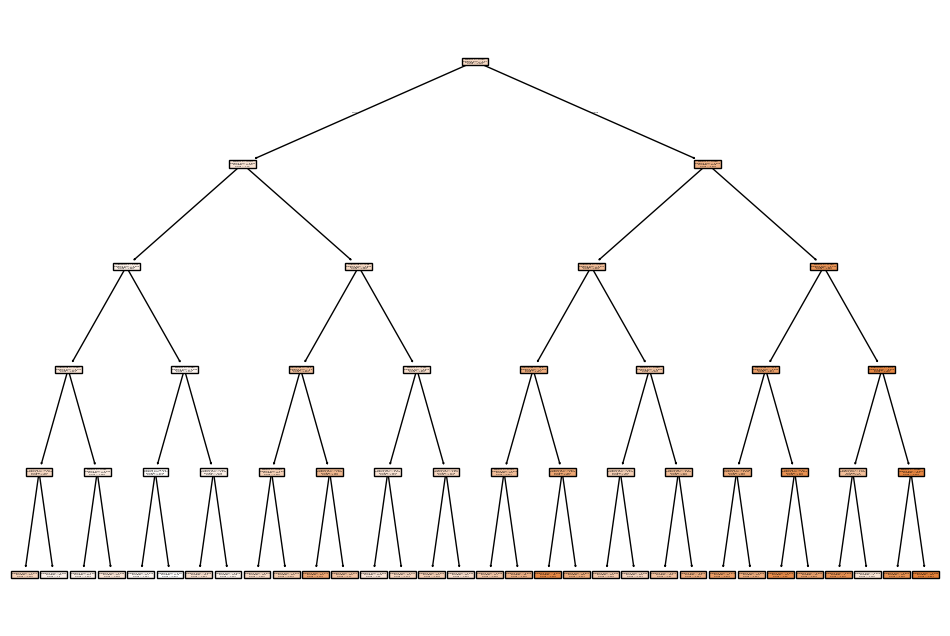

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load California housing dataset
housing = fetch_california_housing(as_frame=True)
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Regression tree
reg = DecisionTreeRegressor(max_depth=5, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualize tree
plt.figure(figsize=(12, 8))
plot_tree(reg, feature_names=housing.feature_names, class_names=housing.target_names, filled=True)
plt.show()